# 一枚検出用

保存しました.
この人は 95.18 % くらい 広瀬すず に似てます。
 
この人は 4.82 % くらい 広瀬アリス に似てます。
 
つまりどちらかと言えば 広瀬すず に似ています！


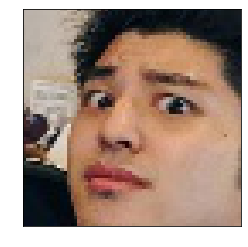

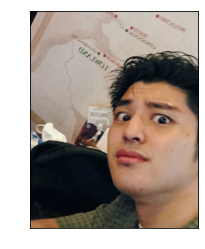

In [165]:
import glob
import os
import cv2
import sys

in_dir = "./photo/normal/test/*.jpg"
in_jpg = glob.glob(in_dir)


#探したいファイル名
want="./photo/normal/test\ozawa.jpg"

K=0
for i in range(len(in_jpg)):
    if in_jpg[i] == want:
        K=i
        break

image=cv2.imread(str(in_jpg[K]))
if image is None:
    print("Not open")
    sys.exit()

image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


face_list=cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))

if len(face_list) > 0:
    for rect in face_list:
        x,y,width,height=rect
        image = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
        if image.shape[0]<64:
            continue
        image = cv2.resize(image,(64,64))
        z=in_jpg[K].split("/")
        fileName=os.path.join("./photo/face/test/" +z[3][5:])
        cv2.imwrite(str(fileName),image)
        print("保存しました.")

else:
    print("no face")
    sys.exit()

#print(image.shape)
        






###ここから判定

import tensorflow as tf
import sys, os
import numpy as np
#from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

imsize = (64, 64)

testpic     = "./photo/face/test/" + z[3][5:]
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズ
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

model = tf.keras.models.load_model(keras_param)
img = load_image(testpic)
prd = model.predict(np.array([img]))

classes = ["広瀬すず", "広瀬アリス"]

for i in range(len(classes)):
    probability = prd[0,i]*100
    name = classes[i]
    print("この人は " + str(round(probability,2)) + " % くらい " + str(name) + " に似てます。")
    print(" ")

prelabel = np.argmax(prd, axis=1)
print("つまりどちらかと言えば " + classes[prelabel[0]] + " に似ています！")


#画像の読み込み
im = Image.open(testpic)

#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)

#軸けし
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)

#表示
plt.show()
    
#画像の読み込み
im = Image.open(in_jpg[K])

#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)

#軸けし
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)

#表示
plt.show()

prob=prd[0,1]
os.rename(testpic,testpic[:-4] +"_"+ str(100-round(prob*100,2))[:4] +"%すず_" + str(round(prob*100,2))[:4] +"%アリス.jpg")
print(" ")

In [162]:
a="sasdsfdj"
print(a[:4])

sasd


# 一般用

In [127]:
import glob,os,cv2,sys,shutil
import matplotlib.pyplot as plt


search="芸能人"        #検索ワード
in_dir = "./photo/face/star/*.jpg"
in_jpg = glob.glob(in_dir)
classes = ["広瀬すず", "広瀬アリス"]


###ここから判定
import sys, os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

imsize = (64, 64)
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズします。
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

model = tf.keras.models.load_model(keras_param)

Y=[i for i in range(len(in_jpg))] #画像の番号
X=[0]*len(in_jpg)                 #どっちに似ているか（0なら広瀬すず1なら広瀬アリス）

for i in range(len(in_jpg)):
    testpic     = in_jpg[i]
    img = load_image(testpic)
    prd = model.predict(np.array([img]))
    
    prob=prd[0,1]         #広瀬アリスならX[i]=1
    X[i]=prob
    
    if prob <= 0.1:
        shutil.copyfile(testpic, "./result/広瀬すず/"+ str(100-round(prob*100,2)) +"%すず_" + str(i)+str(search)+".jpg" )
    elif prob <= 0.3:
        shutil.copyfile(testpic, "./result/広瀬すずのそっくりさん/"+ str(100-round(prob*100,2)) +"%すず_" + str(i)+str(search)+".jpg" )
    elif prob <= 0.7:
        shutil.copyfile(testpic, "./result/どちらでもない/"+ str(100-round(prob*100,2)) +"%すず_" + str(round(prob*100,2)) +"%アリス_" + str(i)+str(search)+".jpg" )
    elif prob <= 0.9:
        shutil.copyfile(testpic, "./result/広瀬アリスのそっくりさん/"+ str(round(prob*100,2)) +"%アリス_" + str(i)+str(search) +".jpg")
    else:
        shutil.copyfile(testpic, "./result/広瀬アリス/"+ str(round(prob*100,2)) +"%アリス_" + str(i)+str(search)+".jpg" )

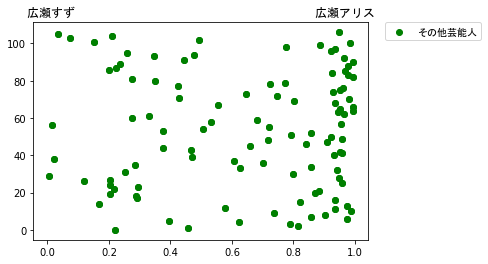

In [128]:
plt.scatter(X,Y,color="g")
plt.scatter(X,Y,color="g",label="その他芸能人")
plt.legend(prop={"family":"MS Gothic"},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("広瀬すず　　　　　　　　　　　　　　　　　　　　広瀬アリス", fontname="MS Gothic")
plt.show()

# ご本人たち

In [129]:
import glob,os,sys,cv2,shutil
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from keras.models import load_model
from PIL import Image

classes = ["広瀬すず", "広瀬アリス"]


###ここから判定

imsize = (64, 64)
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズ
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img


#まずは広瀬すず

in_dir = "./photo/face/suzu/*.jpg"
in_jpg = glob.glob(in_dir)

model = tf.keras.models.load_model(keras_param)

Y_suzu=[i for i in range(len(in_jpg))] #画像の番号
X_suzu=[0]*len(in_jpg)                 #どっちに似ているか（0なら広瀬すず1なら広瀬アリス）

for i in range(len(in_jpg)):
    testpic     = in_jpg[i]
    img = load_image(testpic)
    prd = model.predict(np.array([img]))
    
    prob=prd[0,1]         #広瀬アリスならX[i]=1
    X_suzu[i]=prob
    
    if prob <= 0.5:
        shutil.copyfile(testpic, "./result/本人たち/広瀬すず/"+ str(100-round(prob*100,2)) +"%すず_" + str(i)+".jpg" )
    else:
        shutil.copyfile(testpic, "./result/本人たち/広瀬すずなのに/"+ str(100-round(prob*100,2)) +"%すず_" + str(i)+".jpg" )

        
#次は広瀬アリス

in_dir = "./photo/face/alice/*.jpg"
in_jpg = glob.glob(in_dir)

model = load_model(keras_param)

Y_alice=[i for i in range(len(in_jpg))] #画像の番号
X_alice=[0]*len(in_jpg)                 #どっちに似ているか（0なら広瀬すず1なら広瀬アリス）

for i in range(len(in_jpg)):
    testpic     = in_jpg[i]
    img = load_image(testpic)
    prd = model.predict(np.array([img]))
    
    prob=prd[0,1]         #広瀬アリスならX[i]=1
    X_alice[i]=prob
    
    if prob >= 0.5:
        shutil.copyfile(testpic, "./result/本人たち/広瀬アリス/"+ str(round(prob*100,2)) +"%アリス_" + str(i)+".jpg" )
    else:
        shutil.copyfile(testpic, "./result/本人たち/広瀬アリスなのに/"+ str(round(prob*100,2)) +"%アリス_" + str(i)+".jpg" )

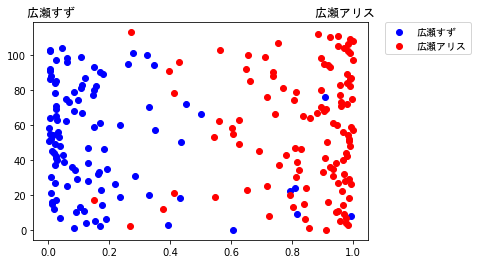

In [130]:
plt.scatter(X_suzu,Y_suzu,color="b",label="広瀬すず")
plt.scatter(X_alice,Y_alice,color="r",label="広瀬アリス")
plt.legend(prop={"family":"MS Gothic"},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("広瀬すず　　　　　　　　　　　　　　　　　　　　広瀬アリス", fontname="MS Gothic")
plt.show()

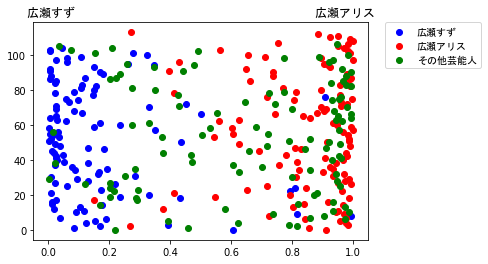

In [131]:
plt.scatter(X_suzu,Y_suzu,color="b",label="広瀬すず")
plt.scatter(X_alice,Y_alice,color="r",label="広瀬アリス")
plt.scatter(X,Y,color="g",label="その他芸能人")
plt.legend(prop={"family":"MS Gothic"},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("広瀬すず　　　　　　　　　　　　　　　　　　　　広瀬アリス", fontname="MS Gothic")
plt.show()

In [167]:
#広瀬すずの写真を使って90%以上の判定が出た確率
a=55/105*100
print("広瀬すず本人率")
print(str(round(a,2))+"%")
print("")

#芸能人の写真を使って90%以上の判定が出た確率
a=5/107*100
print("芸能人の広瀬すず本人率")
print(str(round(a,2))+"%")
print("")

#広瀬アリスの写真を使って90%以上の判定が出た確率
a=64/112*100
print("広瀬アリス本人率")
print(str(round(a,2))+"%")
print("")

#芸能人の写真を使って90%以上の判定が出た確率
a=37/107*100
print("芸能人の広瀬アリス本人率")
print(str(round(a,2))+"%")
print("")

広瀬すず本人率
52.38%

芸能人の広瀬すず本人率
4.67%

広瀬アリス本人率
57.14%

芸能人の広瀬アリス本人率
34.58%

